<a href="https://colab.research.google.com/github/kawachai/VRUNESS/blob/main/TestAug21FaceEmotion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import os
# ‡∏ï‡∏±‡∏ß‡∏≠‡∏¢‡πà‡∏≤‡∏á‡∏Ç‡∏≠‡∏á‡∏Å‡∏≤‡∏£‡∏™‡∏£‡πâ‡∏≤‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡πÄ‡∏û‡∏∑‡πà‡∏≠‡∏ó‡∏≥‡∏Å‡∏≤‡∏£‡πÄ‡∏Å‡πá‡∏ö‡∏†‡∏≤‡∏û‡∏≠‡∏≤‡∏£‡∏°‡∏ì‡πå
# VRUNESS face emotion by Chai Meenorngwar
# ‡∏ó‡∏≥‡∏Å‡∏≤‡∏£‡∏™‡∏£‡πâ‡∏≤‡∏á‡∏ó‡∏µ‡πà‡πÄ‡∏Å‡πá‡∏ö‡∏†‡∏≤‡∏û
emotions = ["angry", "disgusted", "fearful", "happy", "neutral", "sad", "surprised"]
source_dir = "raw_images"

# Create the raw_images directory if it doesn't exist
if not os.path.exists(source_dir):
    os.makedirs(source_dir)

# Create subdirectories for each emotion
for emotion in emotions:
    emotion_source_dir = os.path.join(source_dir, emotion)
    if not os.path.exists(emotion_source_dir):
        os.makedirs(emotion_source_dir)

print("Created raw_images directory and emotion subdirectories.")
# ‡∏Å‡∏≥‡∏´‡∏ô‡∏î‡∏≠‡∏≤‡∏£‡∏°‡∏ì‡πå‡πÅ‡∏•‡∏∞‡πÇ‡∏ü‡∏•‡πÄ‡∏î‡∏≠‡∏£‡πå‡∏ï‡πâ‡∏ô‡∏ó‡∏≤‡∏á‡∏ó‡∏µ‡πà‡πÄ‡∏Å‡πá‡∏ö‡∏†‡∏≤‡∏û
source_dir = "raw_images"  # ‡πÇ‡∏ü‡∏•‡πÄ‡∏î‡∏≠‡∏£‡πå‡∏ó‡∏µ‡πà‡∏°‡∏µ‡πÑ‡∏ü‡∏•‡πå‡∏†‡∏≤‡∏û
dataset_dir = "dataset"    # ‡πÇ‡∏ü‡∏•‡πÄ‡∏î‡∏≠‡∏£‡πå‡∏ó‡∏µ‡πà‡∏à‡∏∞‡πÄ‡∏Å‡πá‡∏ö dataset

# ‡∏™‡∏£‡πâ‡∏≤‡∏á‡πÇ‡∏ü‡∏•‡πÄ‡∏î‡∏≠‡∏£‡πå‡πÄ‡∏Å‡πá‡∏ö dataset ‡∏ñ‡πâ‡∏≤‡πÑ‡∏°‡πà‡∏°‡∏µ
for emotion in emotions:
    emotion_dir = os.path.join(dataset_dir, emotion)
    if not os.path.exists(emotion_dir):
        os.makedirs(emotion_dir)

# ‡πÇ‡∏´‡∏•‡∏î Haar Cascade
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# ‡∏≠‡πà‡∏≤‡∏ô‡πÅ‡∏•‡∏∞‡∏õ‡∏£‡∏∞‡∏°‡∏ß‡∏•‡∏ú‡∏•‡πÑ‡∏ü‡∏•‡πå‡∏†‡∏≤‡∏û‡πÅ‡∏ï‡πà‡∏•‡∏∞‡∏≠‡∏≤‡∏£‡∏°‡∏ì‡πå
for emotion in emotions:
    emotion_source_dir = os.path.join(source_dir, emotion)
    images = os.listdir(emotion_source_dir)
    count = 0

    for img_name in images:
        img_path = os.path.join(emotion_source_dir, img_name)
        img = cv2.imread(img_path)
        if img is None:
            continue

        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

        for (x, y, w, h) in faces:
            face_img = gray[y:y+h, x:x+w]
            face_img = cv2.resize(face_img, (48,48))
            save_path = os.path.join(dataset_dir, emotion, f"{count}.jpg")
            cv2.imwrite(save_path, face_img)
            count += 1

    print(f"‡πÄ‡∏™‡∏£‡πá‡∏à‡∏™‡∏¥‡πâ‡∏ô‡∏Å‡∏≤‡∏£‡∏™‡∏£‡πâ‡∏≤‡∏á dataset ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏≠‡∏≤‡∏£‡∏°‡∏ì‡πå {emotion}, ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏†‡∏≤‡∏û {count} ‡∏£‡∏π‡∏õ")

print("‡∏™‡∏£‡πâ‡∏≤‡∏á dataset ‡πÄ‡∏™‡∏£‡πá‡∏à‡∏™‡∏¥‡πâ‡∏ô‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î")


Created raw_images directory and emotion subdirectories.
‡πÄ‡∏™‡∏£‡πá‡∏à‡∏™‡∏¥‡πâ‡∏ô‡∏Å‡∏≤‡∏£‡∏™‡∏£‡πâ‡∏≤‡∏á dataset ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏≠‡∏≤‡∏£‡∏°‡∏ì‡πå angry, ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏†‡∏≤‡∏û 1 ‡∏£‡∏π‡∏õ
‡πÄ‡∏™‡∏£‡πá‡∏à‡∏™‡∏¥‡πâ‡∏ô‡∏Å‡∏≤‡∏£‡∏™‡∏£‡πâ‡∏≤‡∏á dataset ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏≠‡∏≤‡∏£‡∏°‡∏ì‡πå disgusted, ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏†‡∏≤‡∏û 1 ‡∏£‡∏π‡∏õ
‡πÄ‡∏™‡∏£‡πá‡∏à‡∏™‡∏¥‡πâ‡∏ô‡∏Å‡∏≤‡∏£‡∏™‡∏£‡πâ‡∏≤‡∏á dataset ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏≠‡∏≤‡∏£‡∏°‡∏ì‡πå fearful, ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏†‡∏≤‡∏û 1 ‡∏£‡∏π‡∏õ
‡πÄ‡∏™‡∏£‡πá‡∏à‡∏™‡∏¥‡πâ‡∏ô‡∏Å‡∏≤‡∏£‡∏™‡∏£‡πâ‡∏≤‡∏á dataset ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏≠‡∏≤‡∏£‡∏°‡∏ì‡πå happy, ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏†‡∏≤‡∏û 1 ‡∏£‡∏π‡∏õ
‡πÄ‡∏™‡∏£‡πá‡∏à‡∏™‡∏¥‡πâ‡∏ô‡∏Å‡∏≤‡∏£‡∏™‡∏£‡πâ‡∏≤‡∏á dataset ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏≠‡∏≤‡∏£‡∏°‡∏ì‡πå neutral, ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏†‡∏≤‡∏û 1 ‡∏£‡∏π‡∏õ
‡πÄ‡∏™‡∏£‡πá‡∏à‡∏™‡∏¥‡πâ‡∏ô‡∏Å‡∏≤‡∏£‡∏™‡∏£‡πâ‡∏≤‡∏á dataset ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏≠‡∏≤‡∏£‡∏°‡∏ì‡πå sad, ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏†‡∏≤‡∏û 0 ‡∏£‡∏π‡∏õ
‡πÄ‡∏™‡∏£‡πá‡∏à‡∏™‡∏¥‡πâ‡∏ô‡∏Å‡∏≤‡∏£‡∏™‡∏£‡πâ‡∏≤‡∏á dataset ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏≠‡∏≤‡∏£‡∏°‡

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import cv2
import os
# VRUNESS by  Chai  MEENORNGWAR
# ‡∏Å‡∏≥‡∏´‡∏ô‡∏î‡∏ä‡∏∑‡πà‡∏≠‡∏≠‡∏≤‡∏£‡∏°‡∏ì‡πå (‡∏™‡∏≤‡∏°‡∏≤‡∏£‡∏ñ‡πÄ‡∏û‡∏¥‡πà‡∏°‡πÑ‡∏î‡πâ)
emotions = ["angry", "disgusted", "fearful", "happy", "neutral", "sad", "surprised"]

# ‡∏™‡∏£‡πâ‡∏≤‡∏á‡πÇ‡∏ü‡∏•‡πÄ‡∏î‡∏≠‡∏£‡πå‡πÄ‡∏Å‡πá‡∏ö‡∏†‡∏≤‡∏û‡∏ñ‡πâ‡∏≤‡πÑ‡∏°‡πà‡∏°‡∏µ
dataset_dir = "dataset"
for emotion in emotions:
    emotion_dir = os.path.join(dataset_dir, emotion)
    if not os.path.exists(emotion_dir):
        os.makedirs(emotion_dir)

# ‡πÇ‡∏´‡∏•‡∏î Haar Cascade ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏ï‡∏£‡∏ß‡∏à‡∏à‡∏±‡∏ö‡πÉ‡∏ö‡∏´‡∏ô‡πâ‡∏≤
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# ‡πÄ‡∏õ‡∏¥‡∏î‡∏Å‡∏•‡πâ‡∏≠‡∏á
cap = cv2.VideoCapture(0)

print("‡πÄ‡∏•‡∏∑‡∏≠‡∏Å‡∏≠‡∏≤‡∏£‡∏°‡∏ì‡πå‡∏ó‡∏µ‡πà‡∏ï‡πâ‡∏≠‡∏á‡∏Å‡∏≤‡∏£‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å:")
for i, e in enumerate(emotions):
    print(f"{i}: {e}")

emotion_index = int(input("‡∏Å‡∏£‡∏≠‡∏Å‡∏ï‡∏±‡∏ß‡πÄ‡∏•‡∏Ç‡∏≠‡∏≤‡∏£‡∏°‡∏ì‡πå: "))
selected_emotion = emotions[emotion_index]

print(f"‡πÄ‡∏£‡∏¥‡πà‡∏°‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡∏≠‡∏≤‡∏£‡∏°‡∏ì‡πå: {selected_emotion}")
count = 0
max_images = 100  # ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏†‡∏≤‡∏û‡∏ó‡∏µ‡πà‡∏ï‡πâ‡∏≠‡∏á‡∏Å‡∏≤‡∏£‡πÄ‡∏Å‡πá‡∏ö

while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in faces:
        face_img = gray[y:y+h, x:x+w]
        face_img = cv2.resize(face_img, (48, 48))
        save_path = os.path.join(dataset_dir, selected_emotion, f"{count}.jpg")
        cv2.imwrite(save_path, face_img)
        count += 1

        # ‡πÅ‡∏™‡∏î‡∏á‡∏Å‡∏£‡∏≠‡∏ö‡πÅ‡∏•‡∏∞‡∏ô‡∏±‡∏ö‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏†‡∏≤‡∏û
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255,0,0), 2)
        cv2.putText(frame, f"{count}/{max_images}", (10,30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)

    cv2.imshow("Dataset Creator", frame)

    # ‡∏≠‡∏≠‡∏Å‡∏à‡∏≤‡∏Å‡πÇ‡∏õ‡∏£‡πÅ‡∏Å‡∏£‡∏°‡∏ñ‡πâ‡∏≤ ‡∏Å‡∏î 'q' ‡∏´‡∏£‡∏∑‡∏≠‡∏Ñ‡∏£‡∏ö‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏†‡∏≤‡∏û
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    if count >= max_images:
        break

cap.release()
cv2.destroyAllWindows()
print(f"‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡∏†‡∏≤‡∏û‡πÄ‡∏™‡∏£‡πá‡∏à‡∏™‡∏¥‡πâ‡∏ô ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏†‡∏≤‡∏û: {count} ‡∏£‡∏π‡∏õ ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏≠‡∏≤‡∏£‡∏°‡∏ì‡πå {selected_emotion}")


‡πÄ‡∏•‡∏∑‡∏≠‡∏Å‡∏≠‡∏≤‡∏£‡∏°‡∏ì‡πå‡∏ó‡∏µ‡πà‡∏ï‡πâ‡∏≠‡∏á‡∏Å‡∏≤‡∏£‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å:
0: angry
1: disgusted
2: fearful
3: happy
4: neutral
5: sad
6: surprised
‡∏Å‡∏£‡∏≠‡∏Å‡∏ï‡∏±‡∏ß‡πÄ‡∏•‡∏Ç‡∏≠‡∏≤‡∏£‡∏°‡∏ì‡πå: 1
‡πÄ‡∏£‡∏¥‡πà‡∏°‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡∏≠‡∏≤‡∏£‡∏°‡∏ì‡πå: disgusted
‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡∏†‡∏≤‡∏û‡πÄ‡∏™‡∏£‡πá‡∏à‡∏™‡∏¥‡πâ‡∏ô ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏†‡∏≤‡∏û: 0 ‡∏£‡∏π‡∏õ ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏≠‡∏≤‡∏£‡∏°‡∏ì‡πå disgusted


In [ ]:
import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ----------------------------
# 1. ‡∏Å‡∏≥‡∏´‡∏ô‡∏î‡πÇ‡∏ü‡∏•‡πÄ‡∏î‡∏≠‡∏£‡πå‡∏†‡∏≤‡∏û‡∏ï‡πâ‡∏ô‡∏â‡∏ö‡∏±‡∏ö‡πÅ‡∏•‡∏∞‡πÇ‡∏ü‡∏•‡πÄ‡∏î‡∏≠‡∏£‡πå‡πÄ‡∏Å‡πá‡∏ö‡∏ú‡∏•‡∏•‡∏±‡∏û‡∏ò‡πå
# ----------------------------
input_dir = "raw_images"
output_dir = "augmented_dataset"
os.makedirs(output_dir, exist_ok=True)

# ----------------------------
# 2. ‡∏ï‡∏±‡πâ‡∏á‡∏Ñ‡πà‡∏≤ Data Augmentation
# ----------------------------
datagen = ImageDataGenerator(
    rotation_range=15,          # ‡∏´‡∏°‡∏∏‡∏ô ¬±15¬∞
    width_shift_range=0.1,      # ‡πÄ‡∏•‡∏∑‡πà‡∏≠‡∏ô‡∏ã‡πâ‡∏≤‡∏¢‡∏Ç‡∏ß‡∏≤ 10%
    height_shift_range=0.1,     # ‡πÄ‡∏•‡∏∑‡πà‡∏≠‡∏ô‡∏Ç‡∏∂‡πâ‡∏ô‡∏•‡∏á 10%
    brightness_range=[0.7, 1.3],# ‡∏õ‡∏£‡∏±‡∏ö‡∏Ñ‡∏ß‡∏≤‡∏°‡∏™‡∏ß‡πà‡∏≤‡∏á
    shear_range=0.1,            # ‡∏ö‡∏¥‡∏î‡∏†‡∏≤‡∏û
    zoom_range=0.1,             # ‡∏ã‡∏π‡∏° ¬±10%
    horizontal_flip=True,       # ‡∏û‡∏•‡∏¥‡∏Å‡∏ã‡πâ‡∏≤‡∏¢‡∏Ç‡∏ß‡∏≤
    fill_mode='nearest'         # ‡πÄ‡∏ï‡∏¥‡∏°‡∏ä‡πà‡∏≠‡∏á‡∏ß‡πà‡∏≤‡∏á
)

# ----------------------------
# 3. ‡∏õ‡∏£‡∏∞‡∏°‡∏ß‡∏•‡∏ú‡∏• Data Augmentation
# ----------------------------
for emotion in os.listdir(input_dir):
    emotion_path = os.path.join(input_dir, emotion)
    if not os.path.isdir(emotion_path):
        continue

    save_path = os.path.join(output_dir, emotion)
    os.makedirs(save_path, exist_ok=True)

    for img_name in os.listdir(emotion_path):
        img_path = os.path.join(emotion_path, img_name)
        img = cv2.imread(img_path)
        if img is None:
            continue

        # ‡πÅ‡∏õ‡∏•‡∏á‡πÄ‡∏õ‡πá‡∏ô‡∏Ç‡∏ô‡∏≤‡∏î‡∏°‡∏≤‡∏ï‡∏£‡∏ê‡∏≤‡∏ô ‡πÄ‡∏ä‡πà‡∏ô 48x48 (‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡πÇ‡∏°‡πÄ‡∏î‡∏• CNN ‡∏ï‡∏£‡∏ß‡∏à‡∏à‡∏±‡∏ö‡∏≠‡∏≤‡∏£‡∏°‡∏ì‡πå)
        img = cv2.resize(img, (48, 48))
        img_array = np.expand_dims(img, 0)  # ‡πÄ‡∏û‡∏¥‡πà‡∏°‡∏°‡∏¥‡∏ï‡∏¥ batch

        # ‡∏™‡∏£‡πâ‡∏≤‡∏á Augmented Images 5 ‡∏£‡∏π‡∏õ‡∏ï‡πà‡∏≠ 1 ‡∏ï‡πâ‡∏ô‡∏â‡∏ö‡∏±‡∏ö
        aug_iter = datagen.flow(img_array, batch_size=1, save_to_dir=save_path,
                                save_prefix=emotion, save_format='jpg')
        for _ in range(5):
            next(aug_iter)

print("‚úÖ Data Augmentation ‡πÄ‡∏™‡∏£‡πá‡∏à‡∏™‡∏¥‡πâ‡∏ô ‚Äî Dataset ‡∏û‡∏£‡πâ‡∏≠‡∏°‡∏ù‡∏∂‡∏Å‡πÇ‡∏°‡πÄ‡∏î‡∏• CNN ‡πÅ‡∏•‡πâ‡∏ß!")


‚úÖ Data Augmentation ‡πÄ‡∏™‡∏£‡πá‡∏à‡∏™‡∏¥‡πâ‡∏ô ‚Äî Dataset ‡∏û‡∏£‡πâ‡∏≠‡∏°‡∏ù‡∏∂‡∏Å‡πÇ‡∏°‡πÄ‡∏î‡∏• CNN ‡πÅ‡∏•‡πâ‡∏ß!


In [ ]:
import os
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split

# ----------------------------
# 1. ‡πÇ‡∏´‡∏•‡∏î Dataset
# ----------------------------
data_dir = "augmented_dataset"
img_size = 48
X = []
y = []
label_map = {}

for idx, emotion in enumerate(os.listdir(data_dir)):
    label_map[idx] = emotion
    emotion_path = os.path.join(data_dir, emotion)
    for img_name in os.listdir(emotion_path):
        img_path = os.path.join(emotion_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # ‡πÅ‡∏õ‡∏•‡∏á‡πÄ‡∏õ‡πá‡∏ô grayscale
        if img is None:
            continue
        img = cv2.resize(img, (img_size, img_size))
        X.append(img)
        y.append(idx)

X = np.array(X).reshape(-1, img_size, img_size, 1) / 255.0  # Normalize
y = to_categorical(y, num_classes=len(label_map))

print(f"üì¶ Dataset Loaded: {X.shape[0]} images, {len(label_map)} classes")

# ----------------------------
# 2. ‡πÅ‡∏ö‡πà‡∏á Train/Test
# ----------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ----------------------------
# 3. ‡∏™‡∏£‡πâ‡∏≤‡∏á‡πÇ‡∏°‡πÄ‡∏î‡∏• CNN
# ----------------------------
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 1)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(label_map), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# ----------------------------
# 4. ‡∏ù‡∏∂‡∏Å‡πÇ‡∏°‡πÄ‡∏î‡∏•
# ----------------------------
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=30, batch_size=32)

# ----------------------------
# 5. ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡πÇ‡∏°‡πÄ‡∏î‡∏•
# ----------------------------
model.save("emotion_cnn_model.h5")
print("‚úÖ ‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏ñ‡∏π‡∏Å‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡πÄ‡∏õ‡πá‡∏ô emotion_cnn_model.h5")

# ----------------------------
# 6. ‡∏õ‡∏£‡∏∞‡πÄ‡∏°‡∏¥‡∏ô‡∏ú‡∏•
# ----------------------------
loss, acc = model.evaluate(X_test, y_test)
print(f"üéØ Test Accuracy: {acc*100:.2f}%")


üì¶ Dataset Loaded: 35 images, 7 classes


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ conv2d (Conv2D)                 ‚îÇ (None, 46, 46, 32)     ‚îÇ           320 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d (MaxPooling2D)    ‚îÇ (None, 23, 23, 32)     ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_1 (Conv2D)               ‚îÇ (None, 21, 21, 64)     ‚îÇ        18,496 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d_1 (MaxPooling2D)  ‚îÇ (None, 10, 10, 64)     ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_2 (Conv2D)               ‚îÇ (None, 8, 8, 128)      ‚îÇ        73,856 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d_2 (MaxPooling2D)  ‚îÇ (None, 4, 4, 128)      ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ flatten (Flatten)               ‚îÇ (None, 2048)           ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense (Dense)                   ‚îÇ (None, 128)            ‚îÇ       262,272 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout (Dropout)               ‚îÇ (None, 128)            ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_1 (Dense)                 ‚îÇ (None, 7)              ‚îÇ           903 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 355,847 (1.36 MB)

 Trainable params: 355,847 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 2s/step - accuracy: 0.0714 - loss: 1.9585 - val_accuracy: 0.0000e+00 - val_loss: 1.9500
Epoch 2/30
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 170ms/step - accuracy: 0.1071 - loss: 1.9147 - val_accuracy: 0.0000e+00 - val_loss: 1.9151
Epoch 3/30
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 186ms/step - accuracy: 0.1786 - loss: 1.8362 - val_accuracy: 0.0000e+00 - val_loss: 1.8795
Epoch 4/30
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 286ms/step - accuracy: 0.2500 - loss: 1.8209 - val_accuracy: 0.1429 - val_loss: 1.8498
Epoch 5/30
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 393ms/step - accuracy: 0.2857 - loss: 1.8089 - val_accuracy: 0.4286 - val_loss: 1.8543
Epoch 6/30
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 314ms/step - accuracy: 0.1786 - loss: 1.8280 - val_accuracy: 0.1429 - val_loss: 1.

‚úÖ ‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏ñ‡∏π‡∏Å‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡πÄ‡∏õ‡πá‡∏ô emotion_cnn_model.h5
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 48ms/step - accuracy: 0.7143 - loss: 0.7176
üéØ Test Accuracy: 71.43%


In [ ]:
# ===============================
# 1. ‡∏ï‡∏¥‡∏î‡∏ï‡∏±‡πâ‡∏á‡πÅ‡∏•‡∏∞ import ‡πÑ‡∏•‡∏ö‡∏£‡∏≤‡∏£‡∏µ
# ===============================
!pip install tensorflow opencv-python-headless

import numpy as np
import cv2
from tensorflow.keras.models import load_model
from google.colab import files

# ===============================
# 2. ‡∏≠‡∏±‡∏õ‡πÇ‡∏´‡∏•‡∏î‡πÇ‡∏°‡πÄ‡∏î‡∏• emotion_cnn_model.h5
# ===============================
uploaded = files.upload()  # ‡πÄ‡∏•‡∏∑‡∏≠‡∏Å emotion_cnn_model.h5
model = load_model("emotion_cnn_model.h5")

# ===============================
# 3. ‡∏≠‡∏±‡∏õ‡πÇ‡∏´‡∏•‡∏î‡∏†‡∏≤‡∏û‡∏ó‡∏µ‡πà‡∏ï‡πâ‡∏≠‡∏á‡∏Å‡∏≤‡∏£‡∏ó‡∏î‡∏™‡∏≠‡∏ö
# ===============================
print("üìå ‡∏≠‡∏±‡∏õ‡πÇ‡∏´‡∏•‡∏î‡∏†‡∏≤‡∏û‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏ó‡∏î‡∏™‡∏≠‡∏ö (jpg, png)")
uploaded = files.upload()

# ===============================
# 4. ‡∏Å‡∏≥‡∏´‡∏ô‡∏î Label ‡∏Ç‡∏≠‡∏á‡∏≠‡∏≤‡∏£‡∏°‡∏ì‡πå
# ===============================
emotion_labels = ['Angry','Disgust','Fear','Happy','Sad','Surprise','Neutral']

# ===============================
# 5. ‡∏ü‡∏±‡∏á‡∏Å‡πå‡∏ä‡∏±‡∏ô‡∏ó‡∏î‡∏™‡∏≠‡∏ö‡πÇ‡∏°‡πÄ‡∏î‡∏•
# ===============================
for filename in uploaded.keys():
    # ‡∏≠‡πà‡∏≤‡∏ô‡∏†‡∏≤‡∏û
    img = cv2.imread(filename)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # resize ‡πÉ‡∏´‡πâ‡∏ï‡∏£‡∏á‡∏Å‡∏±‡∏ö input ‡∏Ç‡∏≠‡∏á‡πÇ‡∏°‡πÄ‡∏î‡∏•
    face = cv2.resize(gray, (48, 48))
    face = face / 255.0
    face = np.reshape(face, (1, 48, 48, 1))

    # ‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢‡∏ú‡∏•
    prediction = model.predict(face)
    predicted_label = emotion_labels[np.argmax(prediction)]
    confidence = np.max(prediction)

    print(f"üì∑ File: {filename}")
    print(f"üîé Predicted Emotion: {predicted_label} (Confidence: {confidence:.2f})\n")


Saving image1.jpg to image1 (1).jpg
üìå ‡∏≠‡∏±‡∏õ‡πÇ‡∏´‡∏•‡∏î‡∏†‡∏≤‡∏û‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏ó‡∏î‡∏™‡∏≠‡∏ö (jpg, png)


1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 102ms/step
‚úÖ ‡∏ú‡∏•‡∏Å‡∏≤‡∏£‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢: Neutral (‡∏Ñ‡∏ß‡∏≤‡∏°‡∏°‡∏±‡πà‡∏ô‡πÉ‡∏à 0.24)


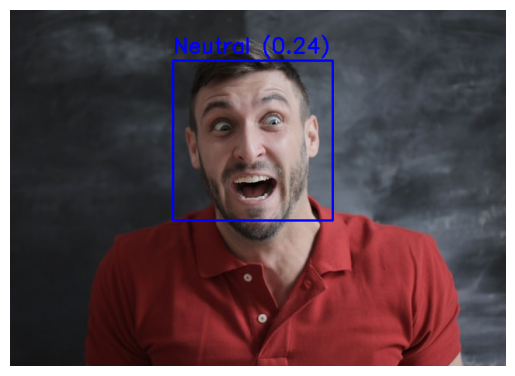

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# ‡πÇ‡∏´‡∏•‡∏î‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏ó‡∏µ‡πà‡∏ù‡∏∂‡∏Å‡πÑ‡∏ß‡πâ
model = load_model("emotion_cnn_model.h5")

# ‡∏Å‡∏≥‡∏´‡∏ô‡∏î label ‡∏Ç‡∏≠‡∏á‡∏≠‡∏≤‡∏£‡∏°‡∏ì‡πå
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# ‡πÇ‡∏´‡∏•‡∏î Haarcascade ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏ï‡∏£‡∏ß‡∏à‡∏à‡∏±‡∏ö‡πÉ‡∏ö‡∏´‡∏ô‡πâ‡∏≤
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# ‡πÇ‡∏´‡∏•‡∏î‡∏£‡∏π‡∏õ‡∏†‡∏≤‡∏û‡∏ó‡∏î‡∏™‡∏≠‡∏ö
img = cv2.imread("image1.jpg")

if img is None:
    print("‚ùå ‡πÑ‡∏°‡πà‡∏û‡∏ö‡πÑ‡∏ü‡∏•‡πå image1.jpg")
else:
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_gray = cv2.resize(roi_gray, (48, 48))
        roi_gray = roi_gray / 255.0
        roi_gray = np.reshape(roi_gray, (1, 48, 48, 1))

        # ‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢‡∏ú‡∏•
        prediction = model.predict(roi_gray)
        label = emotion_labels[np.argmax(prediction)]
        confidence = np.max(prediction)

        # ‡πÅ‡∏™‡∏î‡∏á‡∏ú‡∏•‡∏ö‡∏ô‡∏†‡∏≤‡∏û
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
        cv2.putText(img, f"{label} ({confidence:.2f})", (x, y-10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

        print(f"‚úÖ ‡∏ú‡∏•‡∏Å‡∏≤‡∏£‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢: {label} (‡∏Ñ‡∏ß‡∏≤‡∏°‡∏°‡∏±‡πà‡∏ô‡πÉ‡∏à {confidence:.2f})")

    # ‡πÅ‡∏™‡∏î‡∏á‡∏†‡∏≤‡∏û‡∏ú‡∏•‡∏•‡∏±‡∏û‡∏ò‡πå
    import matplotlib.pyplot as plt
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()


In [ ]:
import numpy as np
from google.colab.patches import cv2_imshow
import argparse
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

mode = "display"

# Create the model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) # Keep this dropout as it is in the original training code

model.add(Flatten())
model.add(Dense(1024, activation='relu')) # Keep this Dense layer as it is in the original code
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

def emotion_recog(frame):
    # Load weights here to ensure the model structure is defined before loading
    model.load_weights('/content/emotion_cnn_model.h5')

    # prevents openCL usage and unnecessary logging messages
    cv2.ocl.setUseOpenCL(False)

    # dictionary which assigns each label an emotion (alphabetical order)
    emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

    #frame = cv2.imread("image1.jpg")
    facecasc = cv2.CascadeClassifier('/content/emotion_recognition/haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = facecasc.detectMultiScale(gray,scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (255, 0, 255), 3)
        roi_gray = gray[y:y + h, x:x + w]
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray, (48, 48)), -1), 0)
        prediction = model.predict(cropped_img)
        maxindex = int(np.argmax(prediction))
        cv2.putText(frame, emotion_dict[maxindex], (x+20, y-60), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

    # cv2_imshow(frame)
    return frame

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
input = cv2.imread("/content/image1.jpg")
output = emotion_recog(input)
cv2_imshow(output)

ValueError: Shape mismatch in layer #3 (named dense_8)for weight sequential_4/dense_8/kernel. Weight expects shape (2048, 1024). Received saved weight with shape (2048, 128)

In [ ]:
from pyngrok import ngrok
# Replace "YOUR_AUTHTOKEN" with your actual ngrok authtoken
ngrok.set_auth_token("YOUR_AUTHTOKEN")

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# ----------------------------
# 1. ‡πÇ‡∏´‡∏•‡∏î‡πÇ‡∏°‡πÄ‡∏î‡∏•‡πÅ‡∏•‡∏∞‡∏Å‡∏≥‡∏´‡∏ô‡∏î‡∏Ñ‡∏•‡∏≤‡∏™‡∏≠‡∏≤‡∏£‡∏°‡∏ì‡πå
# ----------------------------
model = load_model("emotion_cnn_model.h5")

# ‡∏ï‡πâ‡∏≠‡∏á‡∏Å‡∏≥‡∏´‡∏ô‡∏î‡∏Ñ‡∏•‡∏≤‡∏™‡∏ï‡∏≤‡∏°‡∏ó‡∏µ‡πà‡πÉ‡∏ä‡πâ‡∏ù‡∏∂‡∏Å‡πÇ‡∏°‡πÄ‡∏î‡∏•
emotion_labels = ['Angry', 'Happy', 'Neutral', 'Sad', 'Surprise']  # ‡πÅ‡∏Å‡πâ‡πÉ‡∏´‡πâ‡∏ï‡∏£‡∏á‡∏Å‡∏±‡∏ö dataset ‡∏Ç‡∏≠‡∏á‡∏Ñ‡∏∏‡∏ì

# ‡πÇ‡∏´‡∏•‡∏î Haar Cascade ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏ï‡∏£‡∏ß‡∏à‡∏à‡∏±‡∏ö‡πÉ‡∏ö‡∏´‡∏ô‡πâ‡∏≤
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# ----------------------------
# 2. ‡πÄ‡∏õ‡∏¥‡∏î‡∏Å‡∏•‡πâ‡∏≠‡∏á Webcam
# ----------------------------
cap = cv2.VideoCapture(0)  # 0 = ‡∏Å‡∏•‡πâ‡∏≠‡∏á‡∏´‡∏•‡∏±‡∏Å

while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)  # ‡πÅ‡∏õ‡∏•‡∏á‡∏†‡∏≤‡∏û‡πÄ‡∏õ‡πá‡∏ô‡∏Ç‡∏≤‡∏ß‡∏î‡∏≥
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in faces:
        # ‡∏ß‡∏≤‡∏î‡∏Å‡∏£‡∏≠‡∏ö‡πÉ‡∏ö‡∏´‡∏ô‡πâ‡∏≤
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

        # ‡πÄ‡∏ï‡∏£‡∏µ‡∏¢‡∏°‡∏†‡∏≤‡∏û‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡πÇ‡∏°‡πÄ‡∏î‡∏•
        face_img = gray[y:y+h, x:x+w]
        face_img = cv2.resize(face_img, (48, 48))
        face_img = face_img / 255.0
        face_img = np.reshape(face_img, (1, 48, 48, 1))

        # ‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢‡∏≠‡∏≤‡∏£‡∏°‡∏ì‡πå
        prediction = model.predict(face_img)
        emotion_index = np.argmax(prediction)
        emotion_text = emotion_labels[emotion_index]
        confidence = np.max(prediction)

        # ‡πÅ‡∏™‡∏î‡∏á‡∏Ç‡πâ‡∏≠‡∏Ñ‡∏ß‡∏≤‡∏°‡∏≠‡∏≤‡∏£‡∏°‡∏ì‡πå‡∏ö‡∏ô‡∏†‡∏≤‡∏û
        cv2.putText(frame, f"{emotion_text} ({confidence*100:.1f}%)",
                    (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    cv2.imshow("Facial Emotion Recognition", frame)

    # ‡∏Å‡∏î 'q' ‡πÄ‡∏û‡∏∑‡πà‡∏≠‡∏≠‡∏≠‡∏Å
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


In [ ]:
import streamlit as st
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# ‡πÇ‡∏´‡∏•‡∏î‡πÇ‡∏°‡πÄ‡∏î‡∏•
model = load_model("emotion_cnn_model.h5")
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# ‡πÇ‡∏´‡∏•‡∏î Haarcascade ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏ï‡∏£‡∏ß‡∏à‡∏à‡∏±‡∏ö‡πÉ‡∏ö‡∏´‡∏ô‡πâ‡∏≤
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

st.title("üì∑ Emotion Detection from Image/Video")
st.write("‡∏≠‡∏±‡∏õ‡πÇ‡∏´‡∏•‡∏î‡∏†‡∏≤‡∏û‡∏´‡∏£‡∏∑‡∏≠‡∏ß‡∏¥‡∏î‡∏µ‡πÇ‡∏≠‡πÄ‡∏û‡∏∑‡πà‡∏≠‡πÉ‡∏´‡πâ AI ‡∏ï‡∏£‡∏ß‡∏à‡∏à‡∏±‡∏ö‡∏≠‡∏≤‡∏£‡∏°‡∏ì‡πå")

# ‡∏≠‡∏±‡∏õ‡πÇ‡∏´‡∏•‡∏î‡πÑ‡∏ü‡∏•‡πå
uploaded_file = st.file_uploader("‡πÄ‡∏•‡∏∑‡∏≠‡∏Å‡πÑ‡∏ü‡∏•‡πå‡∏†‡∏≤‡∏û‡∏´‡∏£‡∏∑‡∏≠‡∏ß‡∏¥‡∏î‡∏µ‡πÇ‡∏≠", type=["jpg", "jpeg", "png", "mp4", "avi"])

def detect_emotion(frame):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_gray = cv2.resize(roi_gray, (48, 48))
        roi_gray = roi_gray / 255.0
        roi_gray = np.reshape(roi_gray, (1, 48, 48, 1))
        prediction = model.predict(roi_gray)
        label = emotion_labels[np.argmax(prediction)]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        cv2.putText(frame, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)
    return frame

if uploaded_file is not None:
    file_bytes = np.asarray(bytearray(uploaded_file.read()), dtype=np.uint8)

    # ‡∏ï‡∏£‡∏ß‡∏à‡∏ß‡πà‡∏≤‡πÄ‡∏õ‡πá‡∏ô‡∏†‡∏≤‡∏û‡∏´‡∏£‡∏∑‡∏≠‡∏ß‡∏¥‡∏î‡∏µ‡πÇ‡∏≠
    if uploaded_file.type.startswith("image"):
        img = cv2.imdecode(file_bytes, 1)
        result_img = detect_emotion(img)
        st.image(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))

    elif uploaded_file.type.startswith("video"):
        tfile = f"temp_video.{uploaded_file.name.split('.')[-1]}"
        with open(tfile, "wb") as f:
            f.write(file_bytes)

        cap = cv2.VideoCapture(tfile)
        stframe = st.empty()

        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break
            result_frame = detect_emotion(frame)
            stframe.image(cv2.cvtColor(result_frame, cv2.COLOR_BGR2RGB))
        cap.release()


2025-08-14 13:12:21.553 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-14 13:12:21.753 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-08-14 13:12:21.756 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-14 13:12:21.759 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-14 13:12:21.762 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-14 13:12:21.765 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-14 13:12:21.766 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-14 13:12:21.770 Thread 'MainThread': mi

In [ ]:
!pip install streamlit opencv-python tensorflow


In [ ]:
!streamlit run app.py

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: app.py


In [ ]:
# ===============================
# 1. ‡∏ï‡∏¥‡∏î‡∏ï‡∏±‡πâ‡∏á‡πÑ‡∏•‡∏ö‡∏£‡∏≤‡∏£‡∏µ
# ===============================
!pip install streamlit opencv-python-headless tensorflow pyngrok

# ===============================
# 2. ‡∏≠‡∏±‡∏õ‡πÇ‡∏´‡∏•‡∏î‡πÇ‡∏°‡πÄ‡∏î‡∏• emotion_cnn_model.h5
# ===============================
from google.colab import files
uploaded = files.upload()

# ‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡πÑ‡∏ü‡∏•‡πå‡∏ó‡∏µ‡πà‡∏≠‡∏±‡∏õ‡πÇ‡∏´‡∏•‡∏î
import os
print("Files in directory:", os.listdir())

# ===============================
# 3. ‡∏™‡∏£‡πâ‡∏≤‡∏á‡πÑ‡∏ü‡∏•‡πå app.py
# ===============================
%%writefile app.py
import streamlit as st
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import tempfile

# ‡πÇ‡∏´‡∏•‡∏î‡πÇ‡∏°‡πÄ‡∏î‡∏•
model = load_model("emotion_cnn_model.h5")
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# ‡πÇ‡∏´‡∏•‡∏î Haarcascade
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

st.title("üì∑ Emotion Detection from Image/Video")
st.write("‡∏≠‡∏±‡∏õ‡πÇ‡∏´‡∏•‡∏î‡πÑ‡∏ü‡∏•‡πå‡∏†‡∏≤‡∏û‡∏´‡∏£‡∏∑‡∏≠‡∏ß‡∏¥‡∏î‡∏µ‡πÇ‡∏≠ ‡πÅ‡∏•‡πâ‡∏ß‡πÉ‡∏´‡πâ AI ‡∏ï‡∏£‡∏ß‡∏à‡∏à‡∏±‡∏ö‡∏≠‡∏≤‡∏£‡∏°‡∏ì‡πå‡∏à‡∏≤‡∏Å‡πÉ‡∏ö‡∏´‡∏ô‡πâ‡∏≤")

# ‡∏ü‡∏±‡∏á‡∏Å‡πå‡∏ä‡∏±‡∏ô‡∏ï‡∏£‡∏ß‡∏à‡∏à‡∏±‡∏ö‡∏≠‡∏≤‡∏£‡∏°‡∏ì‡πå
def detect_emotion(frame):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_gray = cv2.resize(roi_gray, (48, 48))
        roi_gray = roi_gray / 255.0
        roi_gray = np.reshape(roi_gray, (1, 48, 48, 1))
        prediction = model.predict(roi_gray)
        label = emotion_labels[np.argmax(prediction)]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        cv2.putText(frame, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)
    return frame

# ‡∏≠‡∏±‡∏õ‡πÇ‡∏´‡∏•‡∏î‡πÑ‡∏ü‡∏•‡πå
uploaded_file = st.file_uploader("‡πÄ‡∏•‡∏∑‡∏≠‡∏Å‡πÑ‡∏ü‡∏•‡πå", type=["jpg", "jpeg", "png", "mp4", "avi"])

if uploaded_file is not None:
    # ‡∏ñ‡πâ‡∏≤‡πÄ‡∏õ‡πá‡∏ô‡∏£‡∏π‡∏õ‡∏†‡∏≤‡∏û
    if uploaded_file.type.startswith("image"):
        file_bytes = np.asarray(bytearray(uploaded_file.read()), dtype=np.uint8)
        img = cv2.imdecode(file_bytes, 1)
        result_img = detect_emotion(img)
        st.image(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))

    # ‡∏ñ‡πâ‡∏≤‡πÄ‡∏õ‡πá‡∏ô‡∏ß‡∏¥‡∏î‡∏µ‡πÇ‡∏≠
    elif uploaded_file.type.startswith("video"):
        temp_file = tempfile.NamedTemporaryFile(delete=False)
        temp_file.write(uploaded_file.read())
        cap = cv2.VideoCapture(temp_file.name)
        stframe = st.empty()
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break
            result_frame = detect_emotion(frame)
            stframe.image(cv2.cvtColor(result_frame, cv2.COLOR_BGR2RGB))
        cap.release()

# ===============================
# 4. ‡∏£‡∏±‡∏ô Streamlit ‡∏ú‡πà‡∏≤‡∏ô ngrok
# ===============================


Saving p14.jpg to p14.jpg
Files in directory: ['.config', 'p14.jpg', '.ipynb_checkpoints', 'p24.jpg', 'raw_images', 'dataset', 'augmented_dataset', 'emotion_cnn_model.h5', 'sample_data']


UsageError: Line magic function `%%writefile` not found.


In [ ]:
%%writefile app.py


Overwriting app.py


In [ ]:
%%writefile app.py
import streamlit as st
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import tempfile

# ‡πÇ‡∏´‡∏•‡∏î‡πÇ‡∏°‡πÄ‡∏î‡∏•
model = load_model("emotion_cnn_model.h5")
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# ‡πÇ‡∏´‡∏•‡∏î Haarcascade
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

st.title("üì∑ Emotion Detection from Image/Video")
st.write("‡∏≠‡∏±‡∏õ‡πÇ‡∏´‡∏•‡∏î‡πÑ‡∏ü‡∏•‡πå‡∏†‡∏≤‡∏û‡∏´‡∏£‡∏∑‡∏≠‡∏ß‡∏¥‡∏î‡∏µ‡πÇ‡∏≠ ‡πÅ‡∏•‡πâ‡∏ß‡πÉ‡∏´‡πâ AI ‡∏ï‡∏£‡∏ß‡∏à‡∏à‡∏±‡∏ö‡∏≠‡∏≤‡∏£‡∏°‡∏ì‡πå‡∏à‡∏≤‡∏Å‡πÉ‡∏ö‡∏´‡∏ô‡πâ‡∏≤")

# ‡∏ü‡∏±‡∏á‡∏Å‡πå‡∏ä‡∏±‡∏ô‡∏ï‡∏£‡∏ß‡∏à‡∏à‡∏±‡∏ö‡∏≠‡∏≤‡∏£‡∏°‡∏ì‡πå
def detect_emotion(frame):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_gray = cv2.resize(roi_gray, (48, 48))
        roi_gray = roi_gray / 255.0
        roi_gray = np.reshape(roi_gray, (1, 48, 48, 1))
        prediction = model.predict(roi_gray)
        label = emotion_labels[np.argmax(prediction)]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        cv2.putText(frame, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)
    return frame

# ‡∏≠‡∏±‡∏õ‡πÇ‡∏´‡∏•‡∏î‡πÑ‡∏ü‡∏•‡πå
uploaded_file = st.file_uploader("‡πÄ‡∏•‡∏∑‡∏≠‡∏Å‡πÑ‡∏ü‡∏•‡πå", type=["jpg", "jpeg", "png", "mp4", "avi"])

if uploaded_file is not None:
    # ‡∏ñ‡πâ‡∏≤‡πÄ‡∏õ‡πá‡∏ô‡∏£‡∏π‡∏õ‡∏†‡∏≤‡∏û
    if uploaded_file.type.startswith("image"):
        file_bytes = np.asarray(bytearray(uploaded_file.read()), dtype=np.uint8)
        img = cv2.imdecode(file_bytes, 1)
        result_img = detect_emotion(img)
        st.image(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))

    # ‡∏ñ‡πâ‡∏≤‡πÄ‡∏õ‡πá‡∏ô‡∏ß‡∏¥‡∏î‡∏µ‡πÇ‡∏≠
    elif uploaded_file.type.startswith("video"):
        temp_file = tempfile.NamedTemporaryFile(delete=False)
        temp_file.write(uploaded_file.read())
        cap = cv2.VideoCapture(temp_file.name)
        stframe = st.empty()
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break
            result_frame = detect_emotion(frame)
            stframe.image(cv2.cvtColor(result_frame, cv2.COLOR_BGR2RGB))
        cap.release()


Overwriting app.py


In [ ]:
from pyngrok import ngrok

# ‡∏£‡∏±‡∏ô streamlit
!nohup streamlit run app.py --server.port 8501 &

# ‡πÄ‡∏õ‡∏¥‡∏î public URL
public_url = ngrok.connect(port="8501")
print("Streamlit Web App URL:", public_url)

nohup: appending output to 'nohup.out'


ERROR:pyngrok.process.ngrok:t=2025-08-14T13:35:26+0000 lvl=eror msg="failed to reconnect session" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"


PyngrokNgrokError: The ngrok process errored on start: authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n.

In [ ]:
!nohup streamlit run app.py --server.port 8501 &


nohup: appending output to 'nohup.out'


In [ ]:
public_url = ngrok.connect(port="8501")
print("Streamlit Web App URL:", public_url)

ERROR:pyngrok.process.ngrok:t=2025-08-14T13:36:54+0000 lvl=eror msg="failed to reconnect session" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"
ERROR:pyngrok.process.ngrok:t=2025-08-14T13:36:54+0000 lvl=eror msg="session closing" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"
ERROR:pyngrok.process.ngrok:t=2025-08-14T13:36:54+0000 lvl=eror msg="terminating with error" obj=app err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your aut

PyngrokNgrokError: The ngrok process errored on start: authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n.

In [ ]:
from pyngrok import ngrok


In [ ]:
from pyngrok import ngrok
# Replace "YOUR_AUTHTOKEN" with your actual ngrok authtoken
ngrok.set_auth_token("2dCirJM8rmdxXxtx7IAjLjUXJhe_4vx26UR4beDmLhiaUcUxJ")

In [ ]:
!streamlit run app.py --server.port 8501 & npx localtunnel --port 8501





‚†ô‚†π‚†∏
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.237.236.151:8501

‚†º‚†¥‚†¶‚†ß‚†á‚†è‚†ãNeed to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y)   Stopping...
^C


In [ ]:
!nohup streamlit run app.py --server.port 8501 &


nohup: appending output to 'nohup.out'


In [ ]:
from pyngrok import ngrok
public_url = ngrok.connect(8501)
print("Streamlit App URL:", public_url)


Streamlit App URL: NgrokTunnel: "https://f08c39d9e2ca.ngrok-free.app" -> "http://localhost:8501"


In [ ]:
# ===============================
# 4. ‡πÄ‡∏õ‡∏¥‡∏î Streamlit ‡∏ú‡πà‡∏≤‡∏ô ngrok
# ===============================
from pyngrok import ngrok

# ‡∏£‡∏±‡∏ô Streamlit
get_ipython().system_raw("streamlit run app.py --server.port 8501 &")

# ‡∏™‡∏£‡πâ‡∏≤‡∏á public URL
public_url = ngrok.connect(8501)
print("üìå Streamlit Web App URL:", public_url)


üìå Streamlit Web App URL: NgrokTunnel: "https://f5c05fbcf47c.ngrok-free.app" -> "http://localhost:8501"


In [ ]:
# ===============================
# 1. ‡∏ï‡∏¥‡∏î‡∏ï‡∏±‡πâ‡∏á‡πÑ‡∏•‡∏ö‡∏£‡∏≤‡∏£‡∏µ
# ===============================
!pip install streamlit opencv-python-headless tensorflow pyngrok

# ===============================
# 2. ‡∏≠‡∏±‡∏õ‡πÇ‡∏´‡∏•‡∏î‡πÇ‡∏°‡πÄ‡∏î‡∏• emotion_cnn_model.h5
# ===============================
from google.colab import files
uploaded = files.upload()  # ‡∏≠‡∏±‡∏õ‡πÇ‡∏´‡∏•‡∏î emotion_cnn_model.h5

# ‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡πÑ‡∏ü‡∏•‡πå
import os
print("Files in directory:", os.listdir())

# ===============================
# 3. ‡∏™‡∏£‡πâ‡∏≤‡∏á‡πÑ‡∏ü‡∏•‡πå app.py
# ===============================
%%writefile app.py
import streamlit as st
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import tempfile

# ‡πÇ‡∏´‡∏•‡∏î‡πÇ‡∏°‡πÄ‡∏î‡∏•
model = load_model("emotion_cnn_model.h5")
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# ‡πÇ‡∏´‡∏•‡∏î Haarcascade
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

st.title("üì∑ Emotion Detection from Image/Video")
st.write("‡πÄ‡∏•‡∏∑‡∏≠‡∏Å‡πÇ‡∏´‡∏°‡∏î‡∏≠‡∏±‡∏õ‡πÇ‡∏´‡∏•‡∏î: ‡∏†‡∏≤‡∏û‡∏´‡∏£‡∏∑‡∏≠‡∏ß‡∏¥‡∏î‡∏µ‡πÇ‡∏≠")

# ‡πÄ‡∏•‡∏∑‡∏≠‡∏Å‡πÇ‡∏´‡∏°‡∏î
mode = st.radio("‡πÇ‡∏´‡∏°‡∏î‡∏ï‡∏£‡∏ß‡∏à‡∏à‡∏±‡∏ö", ["‡∏≠‡∏±‡∏õ‡πÇ‡∏´‡∏•‡∏î‡∏†‡∏≤‡∏û", "‡∏≠‡∏±‡∏õ‡πÇ‡∏´‡∏•‡∏î‡∏ß‡∏¥‡∏î‡∏µ‡πÇ‡∏≠"])

def detect_emotion(frame):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_gray = cv2.resize(roi_gray, (48, 48))
        roi_gray = roi_gray / 255.0
        roi_gray = np.reshape(roi_gray, (1, 48, 48, 1))
        prediction = model.predict(roi_gray)
        label = emotion_labels[np.argmax(prediction)]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        cv2.putText(frame, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)
    return frame

if mode == "‡∏≠‡∏±‡∏õ‡πÇ‡∏´‡∏•‡∏î‡∏†‡∏≤‡∏û":
    uploaded_file = st.file_uploader("‡πÄ‡∏•‡∏∑‡∏≠‡∏Å‡πÑ‡∏ü‡∏•‡πå‡∏†‡∏≤‡∏û", type=["jpg", "jpeg", "png"])
    if uploaded_file is not None:
        file_bytes = np.asarray(bytearray(uploaded_file.read()), dtype=np.uint8)
        img = cv2.imdecode(file_bytes, 1)
        result_img = detect_emotion(img)
        st.image(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))

elif mode == "‡∏≠‡∏±‡∏õ‡πÇ‡∏´‡∏•‡∏î‡∏ß‡∏¥‡∏î‡∏µ‡πÇ‡∏≠":
    uploaded_file = st.file_uploader("‡πÄ‡∏•‡∏∑‡∏≠‡∏Å‡πÑ‡∏ü‡∏•‡πå‡∏ß‡∏¥‡∏î‡∏µ‡πÇ‡∏≠", type=["mp4", "avi"])
    if uploaded_file is not None:
        temp_file = tempfile.NamedTemporaryFile(delete=False)
        temp_file.write(uploaded_file.read())
        cap = cv2.VideoCapture(temp_file.name)
        stframe = st.empty()
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break
            result_frame = detect_emotion(frame)
            stframe.image(cv2.cvtColor(result_frame, cv2.COLOR_BGR2RGB))
        cap.release()

# ===============================
# 4. ‡∏£‡∏±‡∏ô Streamlit ‡∏ú‡πà‡∏≤‡∏ô ngrok
# ===============================


KeyboardInterrupt: 